# Tech Job Market and Salaries Analysis 

For our final project, we have selected the Stack Overflow Developer Survey dataset, 
which contains detailed responses from developers regarding their job roles, skills, 
technologies used, and salary information. This dataset is particularly relevant to the 
tech industry, which is a major focus of our group, and will provide insights into the tech 
job market by collecting responses from developers worldwide. It covers various topics 
such as job roles, salary, coding activities, education, technology usage, and job 
satisfaction.<br>

Team Eyy<br>
Members:  
- Julianne Kristine D. Aban 
- Derich Andre G. Arcilla 
- Jennifer Bendoy 
- Richelle Ann C. Candidato 
- Marc Francis B. Gomolon 
- Phoebe Kae A. Plasus

##### Data Preparation

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
# df = pd.read_csv('survey_results_filtered.csv')
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [2]:
# Expand display settings to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 200)     # Adjust rows if needed

In [3]:
# Display column information: name, number of missing values, and dtype
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': df.isnull().sum(),
    'Data Type': df.dtypes
}).reset_index(drop=True)

# Print the column information
print(column_info)

                        Column Name  Missing Values Data Type
0                        ResponseId               0     int64
1                        MainBranch               0    object
2                               Age               0    object
3                        Employment               0    object
4                        RemoteWork           10631    object
5                             Check               0    object
6                  CodingActivities           10971    object
7                           EdLevel            4653    object
8                         LearnCode            4949    object
9                   LearnCodeOnline           16200    object
10                          TechDoc           24540    object
11                        YearsCode            5568    object
12                     YearsCodePro           13827    object
13                          DevType            5992    object
14                          OrgSize           17957    object
15      

In [4]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with more than 50% missing values
high_missing_cols = missing_percentage[missing_percentage > 50]
print("Columns with more than 50% missing values:")
print(high_missing_cols)

Columns with more than 50% missing values:
PlatformAdmired                  52.050063
EmbeddedHaveWorkedWith           66.052845
EmbeddedWantToWorkWith           73.103901
EmbeddedAdmired                  74.428840
MiscTechAdmired                  54.771765
AIToolInterested in Using        53.098400
AIToolNot interested in Using    62.690832
AINextMuch more integrated       79.464217
AINextNo change                  80.900714
AINextMore integrated            62.669438
AINextLess integrated            96.401119
AINextMuch less integrated       98.245641
ICorPM                           54.458487
WorkExp                          54.677018
Knowledge_1                      56.196036
Knowledge_2                      57.178660
Knowledge_3                      57.065575
Knowledge_4                      57.164907
Knowledge_5                      57.394135
Knowledge_6                      57.418586
Knowledge_7                      57.550010
Knowledge_8                      57.580574
Knowledge_9

In [5]:
# Drop columns with more than 50% missing values
df_cleaned = df.drop(columns=high_missing_cols.index)
print(f"Dataset shape after dropping columns: {df_cleaned.shape}")

# Show the names of the remaining columns
remaining_columns = df_cleaned.columns
print(f"Remaining columns ({len(remaining_columns)}):")
print(remaining_columns)

Dataset shape after dropping columns: (65437, 70)
Remaining columns (70):
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'ToolsTechAdmired',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use',
       'Offi

In [6]:
# Fill missing numerical values with median
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# Fill missing categorical values with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

# Check for missing values in numerical columns
print("Missing values in numerical columns:")
print(df_cleaned[numerical_cols].isnull().sum())

# Check for missing values in categorical columns
print("Missing values in categorical columns:")
print(df_cleaned[categorical_cols].isnull().sum())

Missing values in numerical columns:
ResponseId    0
CompTotal     0
dtype: int64
Missing values in categorical columns:
MainBranch                        0
Age                               0
Employment                        0
RemoteWork                        0
Check                             0
CodingActivities                  0
EdLevel                           0
LearnCode                         0
LearnCodeOnline                   0
TechDoc                           0
YearsCode                         0
YearsCodePro                      0
DevType                           0
OrgSize                           0
PurchaseInfluence                 0
BuyNewTool                        0
BuildvsBuy                        0
TechEndorse                       0
Country                           0
Currency                          0
LanguageHaveWorkedWith            0
LanguageWantToWorkWith            0
LanguageAdmired                   0
DatabaseHaveWorkedWith            0
DatabaseWantToW

In [7]:
#Save Cleaned File
df_cleaned.to_csv('cleaned_survey_results.csv', index=False)

##### Exploratory Data Analysis (EDA)

In [ ]:
# place code here

##### Data Analysis Techniques

In [ ]:
# K-means Clustering

In [ ]:
# Linear Regression

In [2]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'ToolsTechAdmired',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'Off

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('cleaned_survey_results.csv')

# Data Cleaning
# Convert 'YearsCode' and 'YearsCodePro' to numeric, handling 'Less than 1 year' and 'More than 50 years'
df['YearsCode'] = df['YearsCode'].replace({'Less than 1 year': 0.5, 'More than 50 years': 50}).apply(pd.to_numeric, errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 50}).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing target (CompTotal) or independent variables
df = df.dropna(subset=['CompTotal', 'YearsCode', 'YearsCodePro', 'EdLevel', 'DevType', 'Age'])

# Handle categorical features
df = pd.get_dummies(df, columns=['Age', 'EdLevel', 'DevType'], drop_first=True)

# Check for non-numeric columns in X
X = df[['YearsCode', 'YearsCodePro'] + [col for col in df.columns if col.startswith(('Age_', 'EdLevel_', 'DevType_'))]]
y = df['CompTotal']

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check for nulls (NaN) and handle them (drop or fill them as needed)
X = X.dropna()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the coefficients and their corresponding features
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Print the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}\n')

# Display the top 19 most influential features
top_10 = coefficients.head(10).reset_index(drop=True)
print("Top 10 Most Influential Features:")
print(top_10[['Feature', 'Coefficient']])



Mean Squared Error: 76405867970660171015506268919676751449235239079225533904988371829251369051899599652829684488264161017797411578226271291148409847516805496226965356798938292424264536476566539759643999489858011612826904281138371802708102578624613267789021444326007874519946340066115504651094151701453110293309685760.00
R-squared: -0.00

Top 10 Most Influential Features:
                                   Feature   Coefficient
0                DevType_DevOps specialist  1.229732e+50
1                      Age_55-64 years old  8.757463e+49
2                    Age_65 years or older  4.535840e+49
3                      Age_45-54 years old  2.860078e+49
4                      Age_35-44 years old  1.460721e+49
5                    Age_Prefer not to say  1.275771e+49
6  DevType_Marketing or sales professional -1.268720e+49
7         DevType_Data or business analyst -8.164903e+48
8           DevType_Database administrator -6.662497e+48
9             DevType_System administrator -6.351945e+48


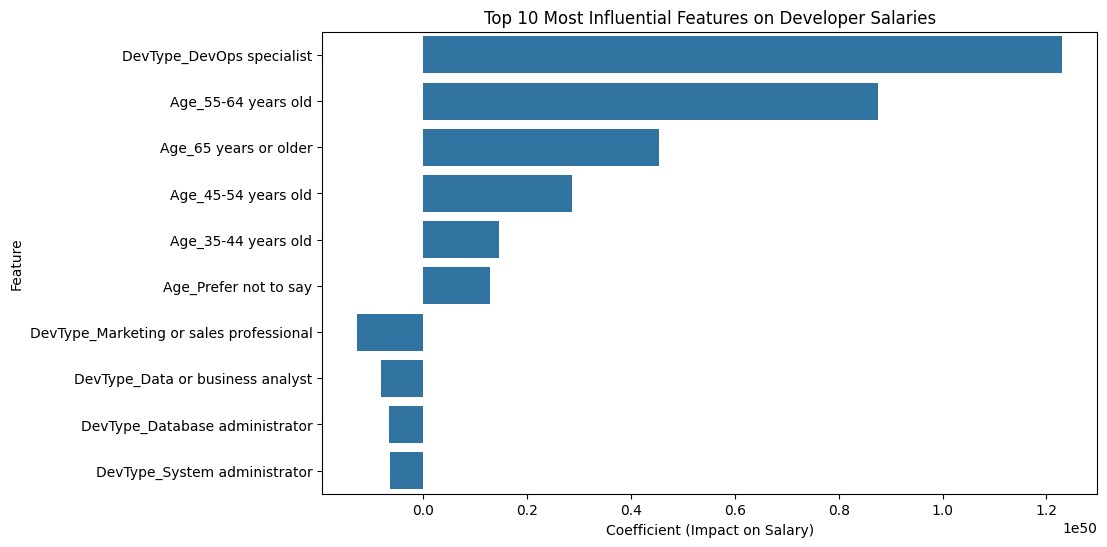

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(10))
plt.title('Top 10 Most Influential Features on Developer Salaries')
plt.xlabel('Coefficient (Impact on Salary)')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Apriori Algorithm